In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data.dataloader import DataLoader
import tiktoken

from src.data_loader import load_data
from src.utils import load_config
from src import wikipedia_article_dataset
from src.models import CNNModel, MultilabelCNNModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
MAX_LENGTH = 400
BATCH_SIZE = 16

EMBEDDING_DIM = 128
NUM_FILTERS = 10
FILTER_SIZES = [3, 4, 5]
DROPOUT = 0.5

In [3]:
from src.utils import load_config
from main import run_preprocessing_pipeline
from sklearn.model_selection import train_test_split

config = load_config("just-load")

X, y = run_preprocessing_pipeline(config)

y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-10 22:44:18,792 - src.utils - INFO - Loading config from configs/just-load.yaml.
2025-03-10 22:44:18,796 - src.data_loader - INFO - Loading data with {'good_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/good.csv', 'promo_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-10 22:44:18,797 - src.data_loader - INFO - Loading non-promotional and promotional data for binary classification.
2025-03-10 22:44:19,389 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-10 22:44:19,389 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-10 22:44:19,390 - src.preprocessing - INFO -

In [4]:
model = CNNModel(X_train.shape[1])

In [5]:
model.fit(X_train, y_train, 0.001, 5, BATCH_SIZE)

Epoch 1/5, Loss: 0.2634
Epoch 2/5, Loss: 0.0472
Epoch 3/5, Loss: 0.0106
Epoch 4/5, Loss: 0.0035
Epoch 5/5, Loss: 0.0019


In [6]:
predictions = model.predict(X_test)

2025-03-10 22:45:24,980 - src.evaluation - INFO - Evaluating the model.
2025-03-10 22:45:25,081 - src.evaluation - INFO - Accuracy: 98.50%
2025-03-10 22:45:25,093 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       199
           1       0.99      0.98      0.98       201

    accuracy                           0.98       400
   macro avg       0.99      0.99      0.98       400
weighted avg       0.99      0.98      0.98       400

2025-03-10 22:45:25,096 - src.evaluation - INFO - Confusion Matrix:
[[197   2]
 [  4 197]]
2025-03-10 22:45:25,210 - src.evaluation - INFO - Evaluation finished.


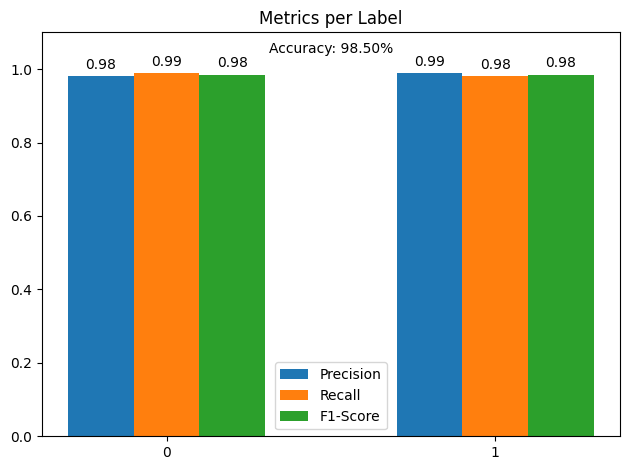

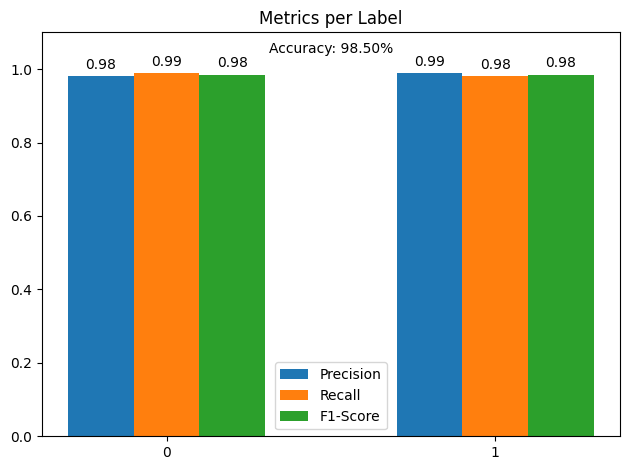

In [7]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [8]:
# config = load_config("just-load")
# df = load_data(config["data_loader"], "multilabel")
# df

columns = ["advert", "coi", "fanpov", "pr", "resume"]

config = load_config("just-load2")

X, y = run_preprocessing_pipeline(config)

y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-10 22:45:25,602 - src.utils - INFO - Loading config from configs/just-load2.yaml.
2025-03-10 22:45:25,619 - src.data_loader - INFO - Loading data with {'good_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/good.csv', 'promo_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-10 22:45:25,623 - src.data_loader - INFO - Loading promotional data for multilabel classification.
2025-03-10 22:45:25,838 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-10 22:45:25,840 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-10 22:45:25,841 - src.preprocessing - INFO - Removing non-w

In [9]:
model = MultilabelCNNModel(X_train.shape[1])

In [10]:
model.fit(X_train, y_train, learning_rate=0.01, num_epochs=3, batch_size=16)

Epoch 1/3, Loss: 0.3410
Epoch 2/3, Loss: 0.1779
Epoch 3/3, Loss: 0.0587


In [11]:
predictions = model.predict(X_test)

2025-03-10 22:45:42,889 - src.evaluation - INFO - Evaluating the model.
2025-03-10 22:45:42,945 - src.evaluation - INFO - Accuracy: 72.50%
2025-03-10 22:45:42,962 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       158
           1       0.33      0.06      0.10        18
           2       0.62      0.42      0.50        12
           3       1.00      0.05      0.09        22
           4       0.75      0.30      0.43        10

   micro avg       0.82      0.74      0.78       220
   macro avg       0.71      0.36      0.40       220
weighted avg       0.80      0.74      0.71       220
 samples avg       0.80      0.78      0.78       220

2025-03-10 22:45:42,966 - src.evaluation - INFO - Confusion Matrix:
[[[ 12  30]
  [  5 153]]

 [[180   2]
  [ 17   1]]

 [[185   3]
  [  7   5]]

 [[178   0]
  [ 21   1]]

 [[189   1]
  [  7   3]]]
2025-03-10 22:45:43,098 - src.evaluation - INFO

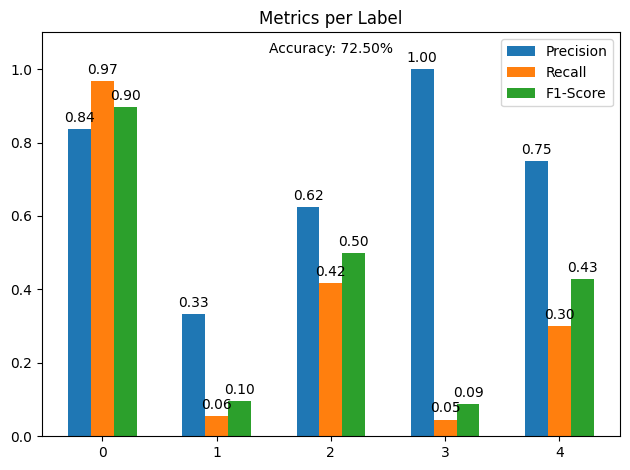

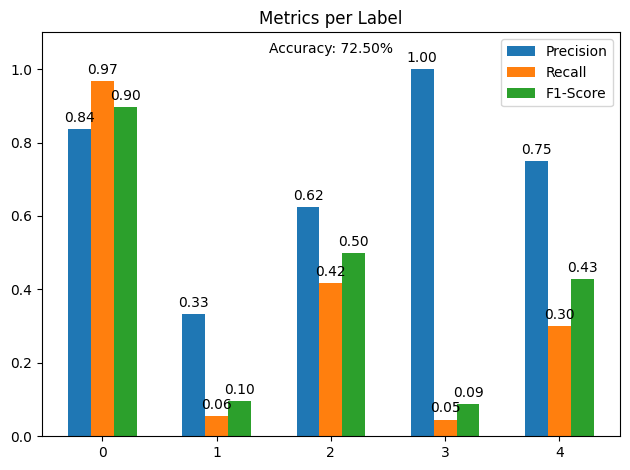

In [12]:
evaluate_model(model, X_test, y_test)